<b>
<br>
<font size="5"><p style="text-align: center;">Trabalho Prático I: Composição Chroma Key</p></font>
<br><br>
</b>
<font size="4"><b>Professor:</b> Jefersson Alex dos Santos
<br><br>
<b>Alunos:</b> </font>
<font size="3">
<br>
Gabriel Lucas Silva Machado
<br>
Bernardo de Almeida Abreu
</font>

<b>
<font size="4"><p ">Introdução</p></font>
</b>

</font>
<font size="3">
[introduzir o problema aqui]
</font>

<b>
<font size="4"><p ">Composições chroma key das imagens</p></font>
</b>

</font>
<font size="3">
Importando bibliotecas necessárias para o trabalho.
</font>


In [1]:
import skimage as ski
import scipy
from skimage import morphology 
from skimage.transform import match_histograms
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

import warnings
warnings.filterwarnings('ignore')

</font>
<font size="3">
Segue abaixo algumas funções auxiliares para realização do trabalho. As 3 primeiras funções são bem simples e só foram utilizadas para facilitar a padronização do formato das imagens, após aplicação de alguma operação. Elas simplesmente carregam imagens, rotacionam ou fazem um escalamento. 
<br>
Já a função chroma_key() realiza a operação fundamental do trabalho. Esta recebe duas imagens como parâmetro, sendo a primeira delas a imagem que será usada como fundo e a segunda a que será inserida no fundo, além de duas coordenadas (x e y), que indicam o quanto a imagem a ser inserida será transladada no resultado final. Uma importante decisão de implementação foi a conversão do espaço de cor RGB para o HSV, pois o segundo separa de forma não correlacionada a cor dos outros elementos presentes em imagens digitais.
</font>


In [2]:
def rescale_image (image, proportion):
    return ski.img_as_ubyte(scipy.misc.imresize(image, proportion, interp ="bicubic"))

def rotate_image(image, degrees):
    return ski.img_as_ubyte(ski.transform.rotate(image, degrees, resize=True, mode='edge'))

def load_image(filename):
    return ski.img_as_ubyte(ski.io.imread(filename))

def chroma_key (background, image, initial_pos_Y, initial_pos_X):
    image =  ski.color.rgb2hsv(image[:,:,:3])
    background =  ski.color.rgb2hsv(background[:,:,:3])
    for i,row in enumerate(image):
        for j,pixel in enumerate(row):
            if not(0.25 < pixel [0] < 0.42 and pixel[2] > 0.2 and pixel[1] > 0.2):
                background[i+initial_pos_Y,j+initial_pos_X,:3] = pixel[:3]
    return ski.img_as_ubyte(ski.color.hsv2rgb(background))

</font>
<font size="3">
A imagem de fundo escolhida para este trabalho consiste em uma foto de WInterfell, retirada do seriado Game of Thrones. A ideia principal da montagem é fazer um crossover dos Starks do universo da Marvel com os Starks do universo da série Game of Thrones. 
</font>

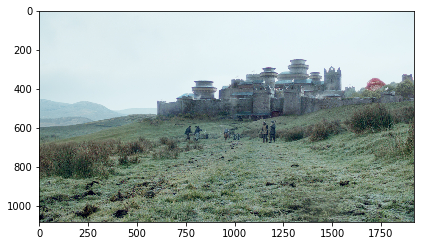

In [3]:
background = load_image("Images/back_ground.jpg")
ski.io.imshow(background)

</font>
<font size="3">
A primeira composição realizada no trabalho consistiu em uma imagem formada por 2 elementos. O primeiro deles é o Tony Stark em sua armadura e o segundo o símbolo da casa Stark de Game of Thrones. A ideia da composição é trocar o reator arc do homem de ferro por esse símbolo. Para isso foi necessário aplicar uma operação geométrica de escalamento no símbolo, para que este encaixasse de forma adequada, sobrepondo o reator arc. O resultado dessa composição pode ser visto abaixo, assim como a sua inserção no fundo proposto. 
<font>

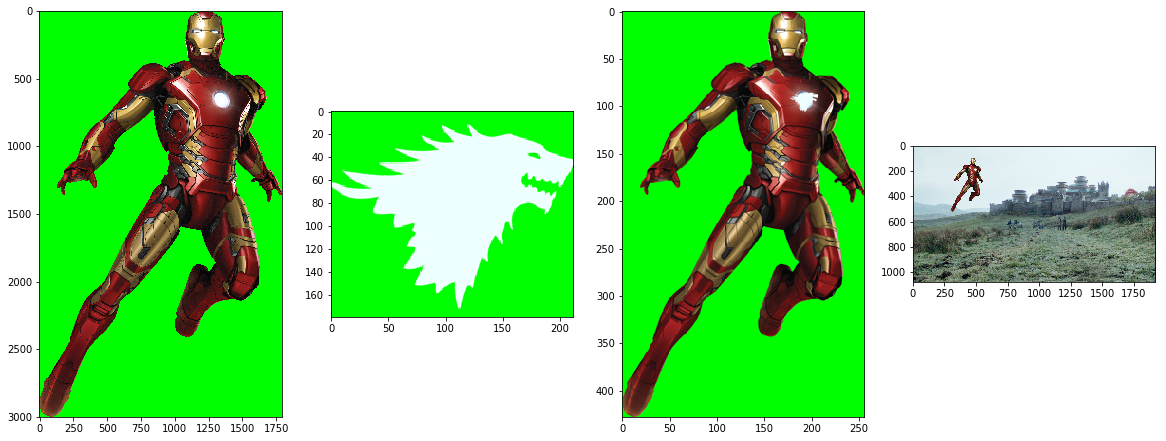

In [4]:
fig, ax = plt.subplots(1, 4)
iron_man = load_image ("Images/ironman.tif")
ax[0].imshow(iron_man)
stark_symbol =  load_image ("Images/stark_symbol.tif")
stark_symbol = rescale_image(stark_symbol, 0.23)
ax[1].imshow(stark_symbol)
iron_man = chroma_key (iron_man, stark_symbol, 580, 1240) 
iron_man = rescale_image(iron_man, 1/7)
ax[2].imshow(iron_man)
assembled_img = chroma_key (background, iron_man, 100, 300)
ax[3].imshow(assembled_img)
fig.set_size_inches(20, 10)

</font>
<font size="3">
A segunda composição usada no trabalho também foi feita utilizando duas imagens. A ideia dessa composição é colocar o rosto de Arya Stark em uma armadura do homem de ferro. Segue abaixo a forma em que essa composição foi feita e sua respectiva inserção na imagem de fundo.
</font>

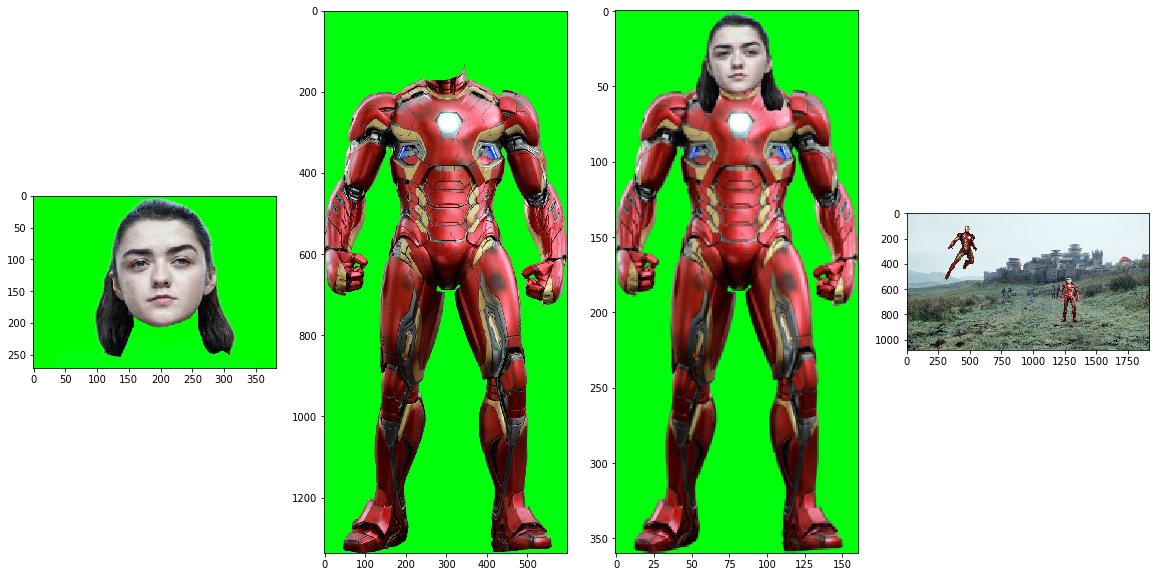

In [5]:
fig, ax = plt.subplots(1, 4)
arya_stark_head = load_image ("Images/arya_head.tif")
ax[0].imshow(arya_stark_head)
iron_man_armor = load_image("Images/ironman armor.tif")
ax[1].imshow(iron_man_armor)
arya = chroma_key(iron_man_armor, arya_stark_head, 0, 100)
arya = rescale_image(arya, 0.27)
ax[2].imshow(arya)
assembled_img = chroma_key (assembled_img, arya, 500, 1200)
ax[3].imshow(assembled_img)
fig.set_size_inches(20, 10)

</font>
<font size="3">
A terceira composição insere Sansa Stark na imagem de fundo escolhida, como pode ser visto abaixo.
</font>

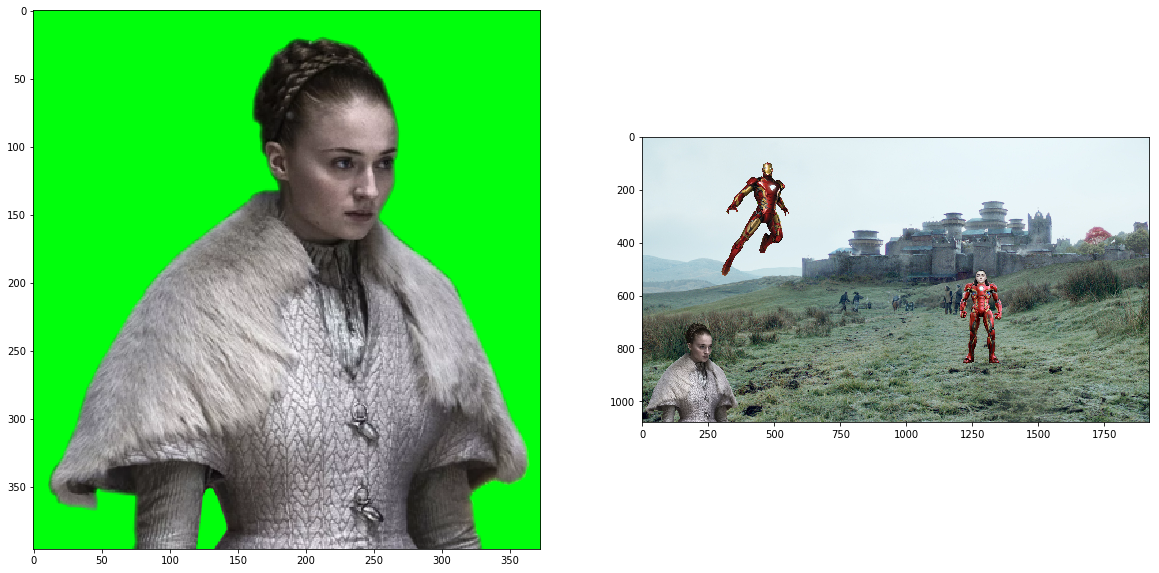

In [6]:
fig, ax = plt.subplots(1, 2)
sansa = load_image ("Images/sansa_stark.tif")
sansa = rescale_image(sansa, 0.45)
ax[0].imshow(sansa)
assembled_img = chroma_key(assembled_img, sansa, 684, 0)
ax[1].imshow(assembled_img)
fig.set_size_inches(20, 10)

</font>
<font size="3">
A quarta composição referencia um evento ocorrido na primeira temporada de Game of Thrones. Para realizá-la foi necessário utilizar um fundo verde extra, pois para que a mão da armadura ficasse sobreposta sobre a cabeça de Ned Stark era necessário que fosse realizada uma operação de chroma key em que a imagem de fundo fosse a cabeça. Além desse fundo extra, foi necessário aplicar uma operação geométrica de escalamento, para que a cabeça ficasse no tamanho apropriado para encaixar na mão da armadura. O resultado dessa composição se encontra abaixo, assim como a sua inserção no fundo escolhido. 
</font>

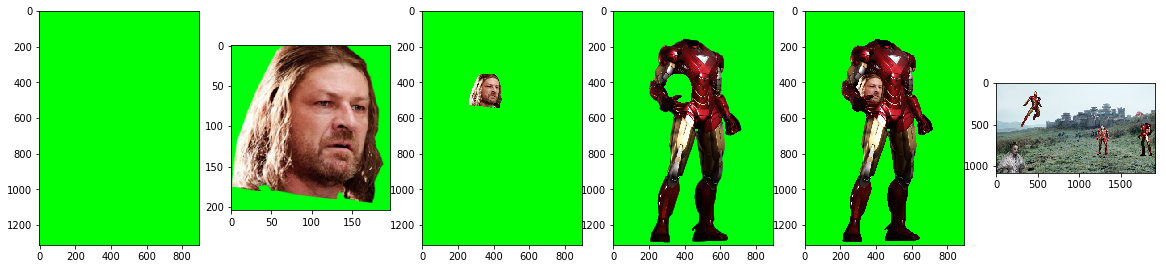

In [7]:
fig, ax = plt.subplots(1, 6)
green_background = np.zeros((1311 ,894 ,3))
green_background[:,:,1] = 1
ax[0].imshow(green_background)
ned_head = load_image("Images/ned_head.tif")
ned_head = ned_head[:, ::-1]
ned_head = rescale_image (ned_head, 0.43)
ax[1].imshow(ned_head)
green_background = chroma_key(green_background, ned_head,350, 260) 
ax[2].imshow(green_background)
ned_armor = load_image("Images/ironman holding helmet.tif")
ax[3].imshow(ned_armor)
ned_armor = chroma_key(green_background, ned_armor, 0, 0) 
ax[4].imshow(ned_armor)
ned_armor = ned_armor[:, ::-1]
ned_armor = rescale_image(ned_armor, 0.35)
assembled_img = chroma_key(assembled_img, ned_armor, 425, 1640)
ax[5].imshow(assembled_img)
fig.set_size_inches(20, 10)

</font>
<font size="3">
A sexta composição utiliza uma ideia semelhante a da segunda. Ela consiste em colocar a cabeça de Robb Stark na armadura do homem de ferro. Para fazer isso, foi necessário realizar uma operação geométrica de escalamento, pois a cabeça não estava em um tamanho proporcional ao corpo. O resultado da composição, assim como a sua inserção no fundo escolhido se encontram logo abaixo.
</font>

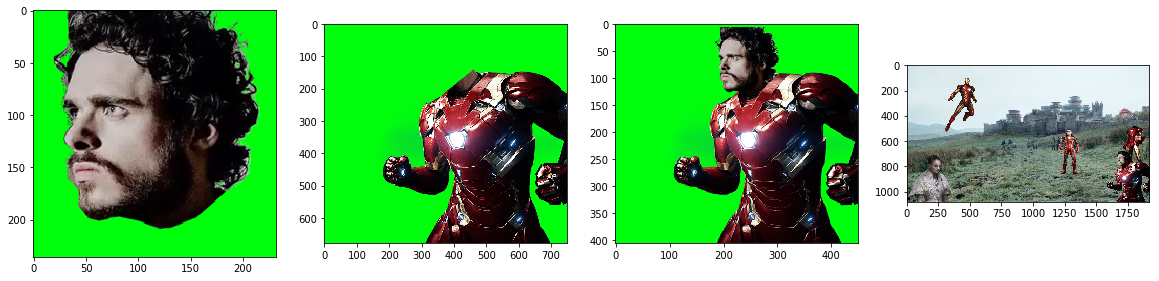

In [8]:
fig, ax = plt.subplots(1, 4)
robb_head = load_image ("Images/robb_head.tif")
robb_head = robb_head[:, ::-1]
robb_head = rescale_image(robb_head, 0.75)
ax[0].imshow(robb_head)
robb_armor = load_image("Images/tony_stark.tif")
robb_armor = robb_armor[:, ::-1]
ax[1].imshow(robb_armor)
robb_armor = chroma_key(robb_armor, robb_head, 10 , 290)
robb_armor = rescale_image(robb_armor, 0.6)
ax[2].imshow(robb_armor)
assembled_img = chroma_key(assembled_img, robb_armor,674, 1470)
ax[3].imshow(assembled_img)
fig.set_size_inches(20, 10)

</font>
<font size="3">
A sétima composição consiste em colocar o Corvo de Três Olhos (3-Eyed Raven), representando Bran Stark, no ombro de Robb Stark. Foi necessário aplicar uma operação de escalamento para que o corvo encaixasse no tamanho apropriado, como pode ser visto logo abaixo.
</font>

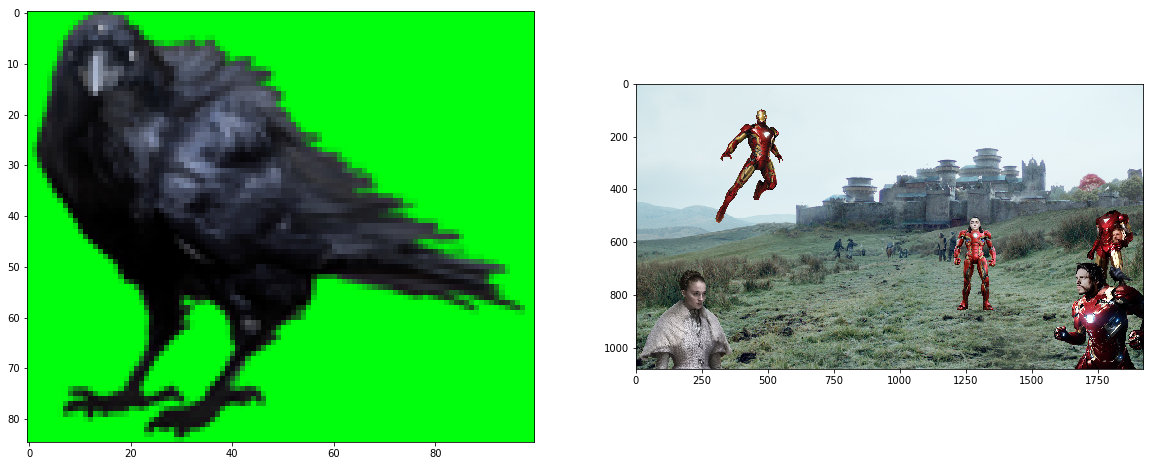

In [9]:
fig, ax = plt.subplots(1, 2)
bran_raven = load_image("Images/raven.tif")
bran_raven = rescale_image(bran_raven, 0.20)
ax[0].imshow(bran_raven)
assembled_img = chroma_key(assembled_img ,bran_raven ,690 ,1785)
ax[1].imshow(assembled_img)
fig.set_size_inches(20, 10)

</font>
<font size="3">
A última composição consiste em uma mistura de 2 dos principais vilões presentes nos universos escolhidos. A composição do corpo de Thanos (vilão dos filmes: Avengers: Infinity War e Avengers: Endgame) com a cabeça do Rei da Noite (vilão do seriado Game of Thrones) foi feita de maneira semelhante as demais composições, necessitando de operações de escalamento para que a cabeça se encaixasse bem no corpo. O resultado dessa composição se encontra logo abaixo.
</font>

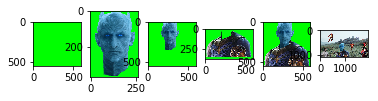

In [10]:
fig, ax = plt.subplots(1, 6)
green_background = np.zeros((551,594,3))
green_background[:,:,1] = 1
ax[0].imshow(green_background)
nk_head = load_image("Images/nk_head.tif")
nk_head = rescale_image(nk_head, 0.45)
ax[1].imshow(nk_head)
nk_head = chroma_key(green_background, nk_head, 0, 134)
ax[2].imshow(nk_head)
thanos = load_image("Images/thanos.tif")
ax[3].imshow(thanos)
nk_thanos = chroma_key(nk_head, thanos, 200, 0)
ax[4].imshow(nk_thanos)
assembled_img = chroma_key(assembled_img, nk_thanos, 529, 600)
ax[5].imshow(assembled_img)
plt.rcParams['figure.figsize'] = [20, 10]

<b>
<font size="4"><p ">Operações e filtros utilizados</p></font>
</b>

<b>
<font size="3"><p ">Operações geométricas</p></font>
</b>

</font>
<font size="3">
Como foi dito acima, em praticamente todas as composições chroma key realizadas no trabalho foram aplicadas as operações geométricas de escalamento e translação.
</font>

<b>
<font size="3"><p ">Casamento de histogramas</p></font>
</b>

<font size="3">
Foi aplicado um casamento de histogramas entre a imagem final obtida e a imagem de fundo original para obter uma divergência menor entre as cores da imagem.
</font>

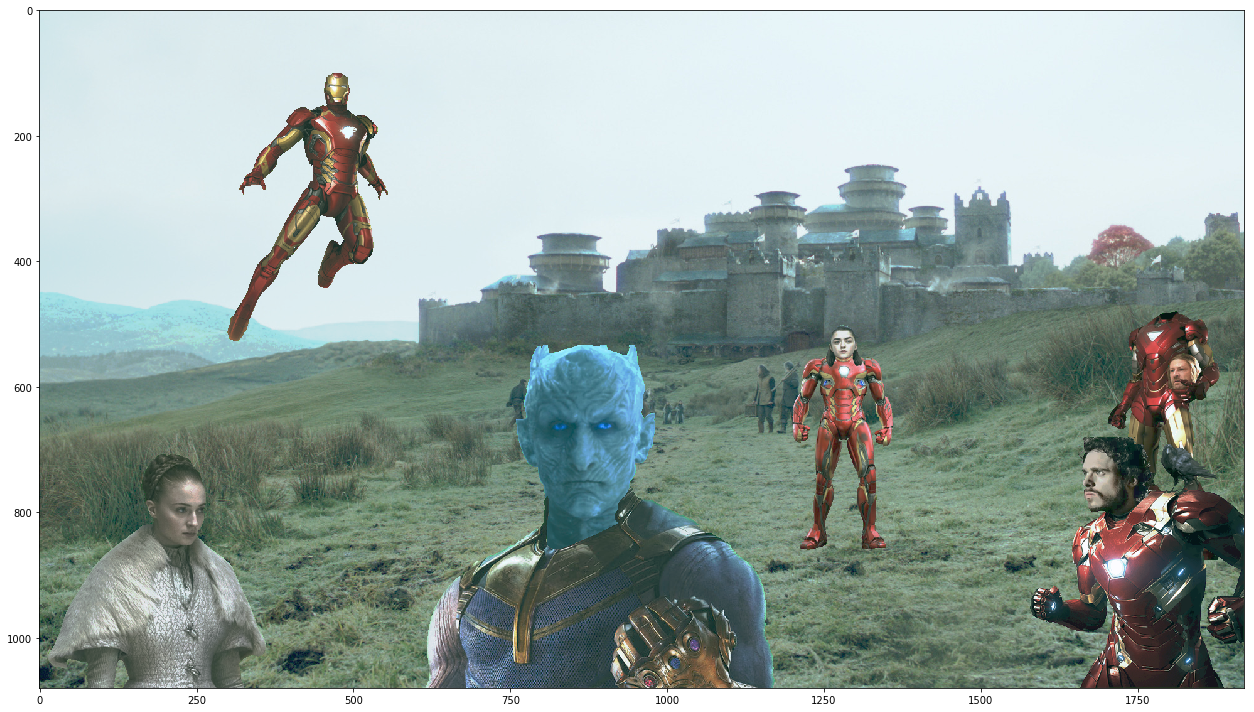

In [11]:
assembled_img = match_histograms(assembled_img, background, multichannel=True)
ski.io.imshow(assembled_img)

<b>
<font size="3"><p ">Filtro Gaussiano</p></font>
</b>

<font size="3">
Foi aplicado um filtro gaussiano para suavizar a mudança entre as imagens com fundo verde e a imagem de fundo original.
</font>

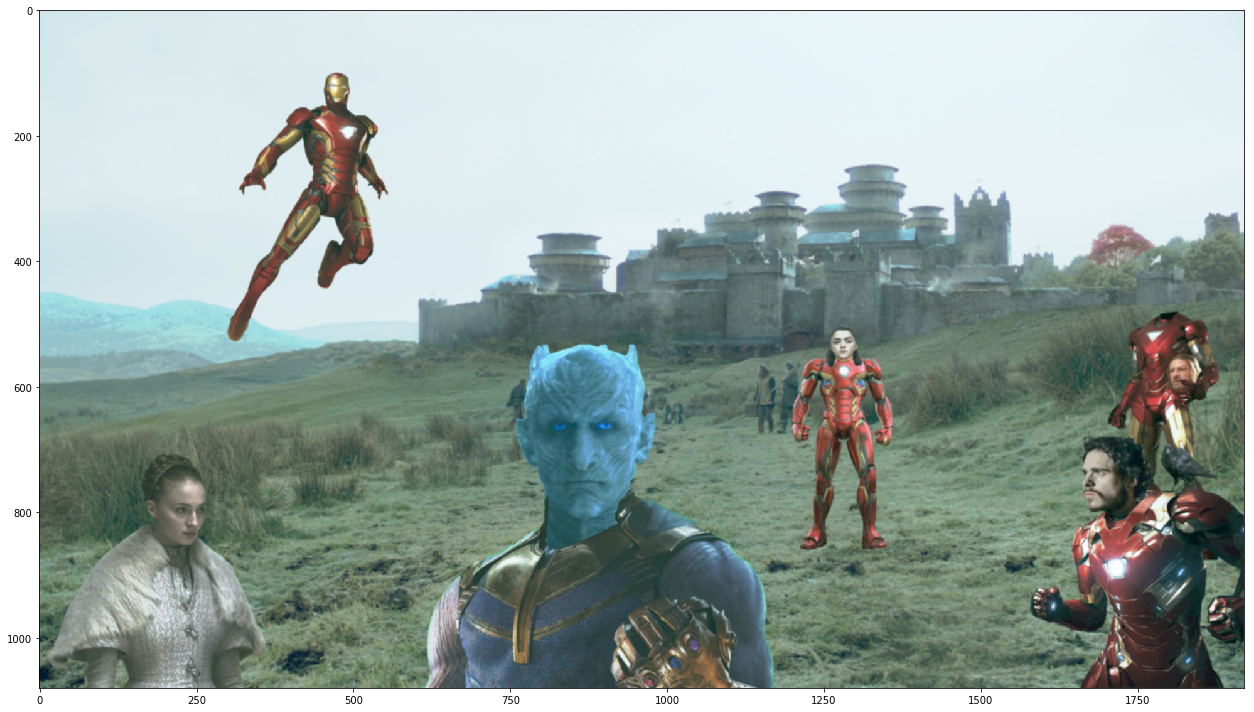

In [12]:
assembled_img = ski.img_as_ubyte(ski.filters.gaussian(assembled_img))
ski.io.imshow(assembled_img)

<b>
<font size="4"><p ">Resultado final</p></font>
</b>

</font>
<font size="3">
Segue abaixo uma visualização da composição final e o código para salvar a imagem.
</font>

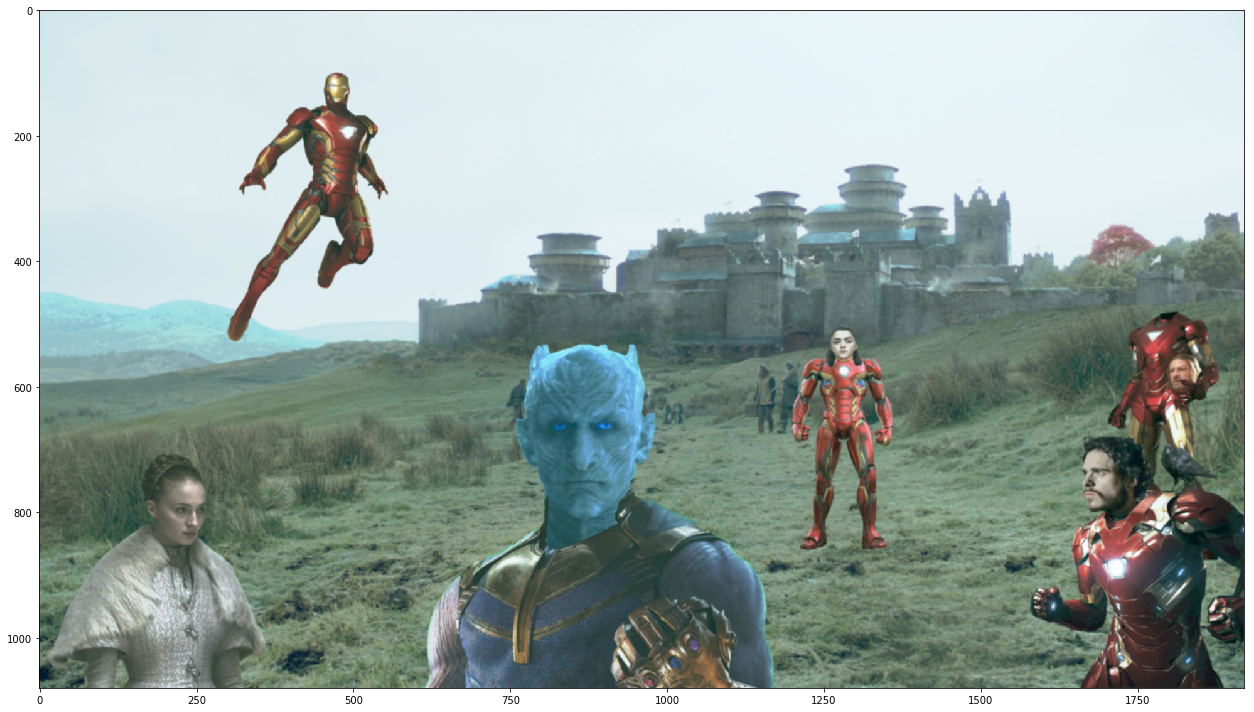

In [13]:
plt.rcParams['figure.figsize'] = [20, 10]
final_image = assembled_img
ski.io.imshow(final_image)
ski.io.imsave("final_image.png",final_image)